# Chronic kidney disease

## Load data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# fetch dataset 
#risk_factor_prediction_of_chronic_kidney_disease = fetch_ucirepo(id=857)

# data (as pandas dataframes) 
#X = risk_factor_prediction_of_chronic_kidney_disease.data.features
#X = X.map(str)
#y = risk_factor_prediction_of_chronic_kidney_disease.data.targets 

In [3]:
risk_factor_prediction_of_chronic_kidney_disease_df = pd.read_csv('/home/chrisorduna/Repositories/MNA/MLOps/MLOps Class/data/raw/ckd-dataset-v2.csv',
                                                                  header=0, skiprows=[1, 2, 3])
risk_factor_prediction_of_chronic_kidney_disease_df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
2,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
3,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20
4,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,102.115 - 127.281,s1,0,12 - 20


In [4]:
risk_factor_prediction_of_chronic_kidney_disease_df.columns

Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage',
       'affected', 'age'],
      dtype='object')

- **bp (Diastolic)**: Diastolic blood pressure (in mm/Hg), could indicate whether the blood pressure is within the normal range.

- **bp limit**: A limit or threshold related to blood pressure (exact meaning can vary).
- **sg**: Specific gravity of urine, an indicator of kidney function.
- **al**: Albumin level in urine, used to detect kidney disease.
- **rbc**: Red blood cells in urine, which may indicate kidney damage.
- **su**: Sugar level in urine, used to monitor diabetes.
- **pc**: Pus cells in urine, indicating possible infection.
- **pcc**: Pus cell clumps in urine, a more severe indicator of infection.
- **ba**: Bacteria in urine, indicating a urinary tract infection.
- **bgr**: Blood glucose random, a measure of blood sugar levels.
- **bu**: Blood urea, a measure of kidney function.
- **sod**: Sodium level in the blood, important for kidney and overall health.
- **sc**: Serum creatinine, a key measure of kidney function.
- **pot**: Potassium level in the blood, which affects heart and muscle function.
- **hemo**: Hemoglobin level, indicating the oxygen-carrying capacity of the blood.
- **pcv**: Packed cell volume, a measure of the proportion of blood volume that is occupied by red blood cells.
- **rbcc**: Red blood cell count, used to assess overall health and oxygen-carrying capacity.
- **wbcc**: White blood cell count, important for immune function.
- **htn**: Hypertension (yes/no), indicating the presence of high blood pressure.
- **dm**: Diabetes mellitus (yes/no), indicating the presence of diabetes.
- **cad**: Coronary artery disease (yes/no), indicating the presence of heart disease.
- **appet**: Appetite (good/poor), which can be an indicator of overall health.
- **pe**: Pedal edema (yes/no), indicating swelling in the lower legs, often associated with kidney or heart disease.
- **ane**: Anemia (yes/no), indicating a lower-than-normal red blood cell count.
- **grf**: Glomerular filtration rate, a measure of kidney function (low values indicate impaired function).
- **stage**: The stage of chronic kidney disease (likely 1-5).
- **affected**: A binary indicator of whether the patient is affected by chronic kidney disease.
- **age**: Age of the patient in years.
- **class**: The final classification of the patient (ckd: chronic kidney disease or notckd: not affected by chronic kidney disease).


In [5]:
risk_factor_prediction_of_chronic_kidney_disease_df['class'].value_counts()

class
ckd       127
notckd     72
Name: count, dtype: int64

## EDA

In [6]:
risk_factor_prediction_of_chronic_kidney_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  199 non-null    int64 
 1   bp limit        199 non-null    int64 
 2   sg              199 non-null    object
 3   al              199 non-null    object
 4   class           199 non-null    object
 5   rbc             199 non-null    int64 
 6   su              199 non-null    object
 7   pc              199 non-null    int64 
 8   pcc             199 non-null    int64 
 9   ba              199 non-null    int64 
 10  bgr             199 non-null    object
 11  bu              199 non-null    object
 12  sod             199 non-null    object
 13  sc              199 non-null    object
 14  pot             199 non-null    object
 15  hemo            199 non-null    object
 16  pcv             199 non-null    object
 17  rbcc            199 non-null    object
 18  wbcc      

In [7]:
risk_factor_prediction_of_chronic_kidney_disease_df.isna().sum()

bp (Diastolic)    0
bp limit          0
sg                0
al                0
class             0
rbc               0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sod               0
sc                0
pot               0
hemo              0
pcv               0
rbcc              0
wbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
grf               0
stage             0
affected          0
age               0
dtype: int64

In [8]:
categorical_data_df = risk_factor_prediction_of_chronic_kidney_disease_df.select_dtypes(include=object)
quantitative_data_df = risk_factor_prediction_of_chronic_kidney_disease_df.select_dtypes(include=np.number)

In [9]:
# Quantitative variables
quantitative_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
bp (Diastolic),199.0,0.542714,0.499429,0.0,0.0,1.0,1.0,1.0
bp limit,199.0,0.758794,0.805355,0.0,0.0,1.0,1.0,2.0
rbc,199.0,0.125628,0.332266,0.0,0.0,0.0,0.0,1.0
pc,199.0,0.226131,0.419380,0.0,0.0,0.0,0.0,1.0
pcc,199.0,0.135678,0.343310,0.0,0.0,0.0,0.0,1.0
ba,199.0,0.055276,0.229095,0.0,0.0,0.0,0.0,1.0
htn,199.0,0.391960,0.489419,0.0,0.0,0.0,1.0,1.0
dm,199.0,0.351759,0.478723,0.0,0.0,0.0,1.0,1.0
cad,199.0,0.110553,0.314368,0.0,0.0,0.0,0.0,1.0
appet,199.0,0.201005,0.401763,0.0,0.0,0.0,0.0,1.0


In [10]:
# Categorical variables
categorical_data_df.describe().T

,count,unique,top,freq
sg,199,5,1.019 - 1.021,74
al,199,5,< 0,116
class,199,2,ckd,127
su,199,6,< 0,169
bgr,199,10,112 - 154,79
bu,199,8,< 48.1,107
sod,199,9,133 - 138,92
sc,199,7,< 3.65,158
pot,199,4,< 7.31,196
hemo,199,10,11.3 - 12.6,48


### Plot data

#### Categorical data

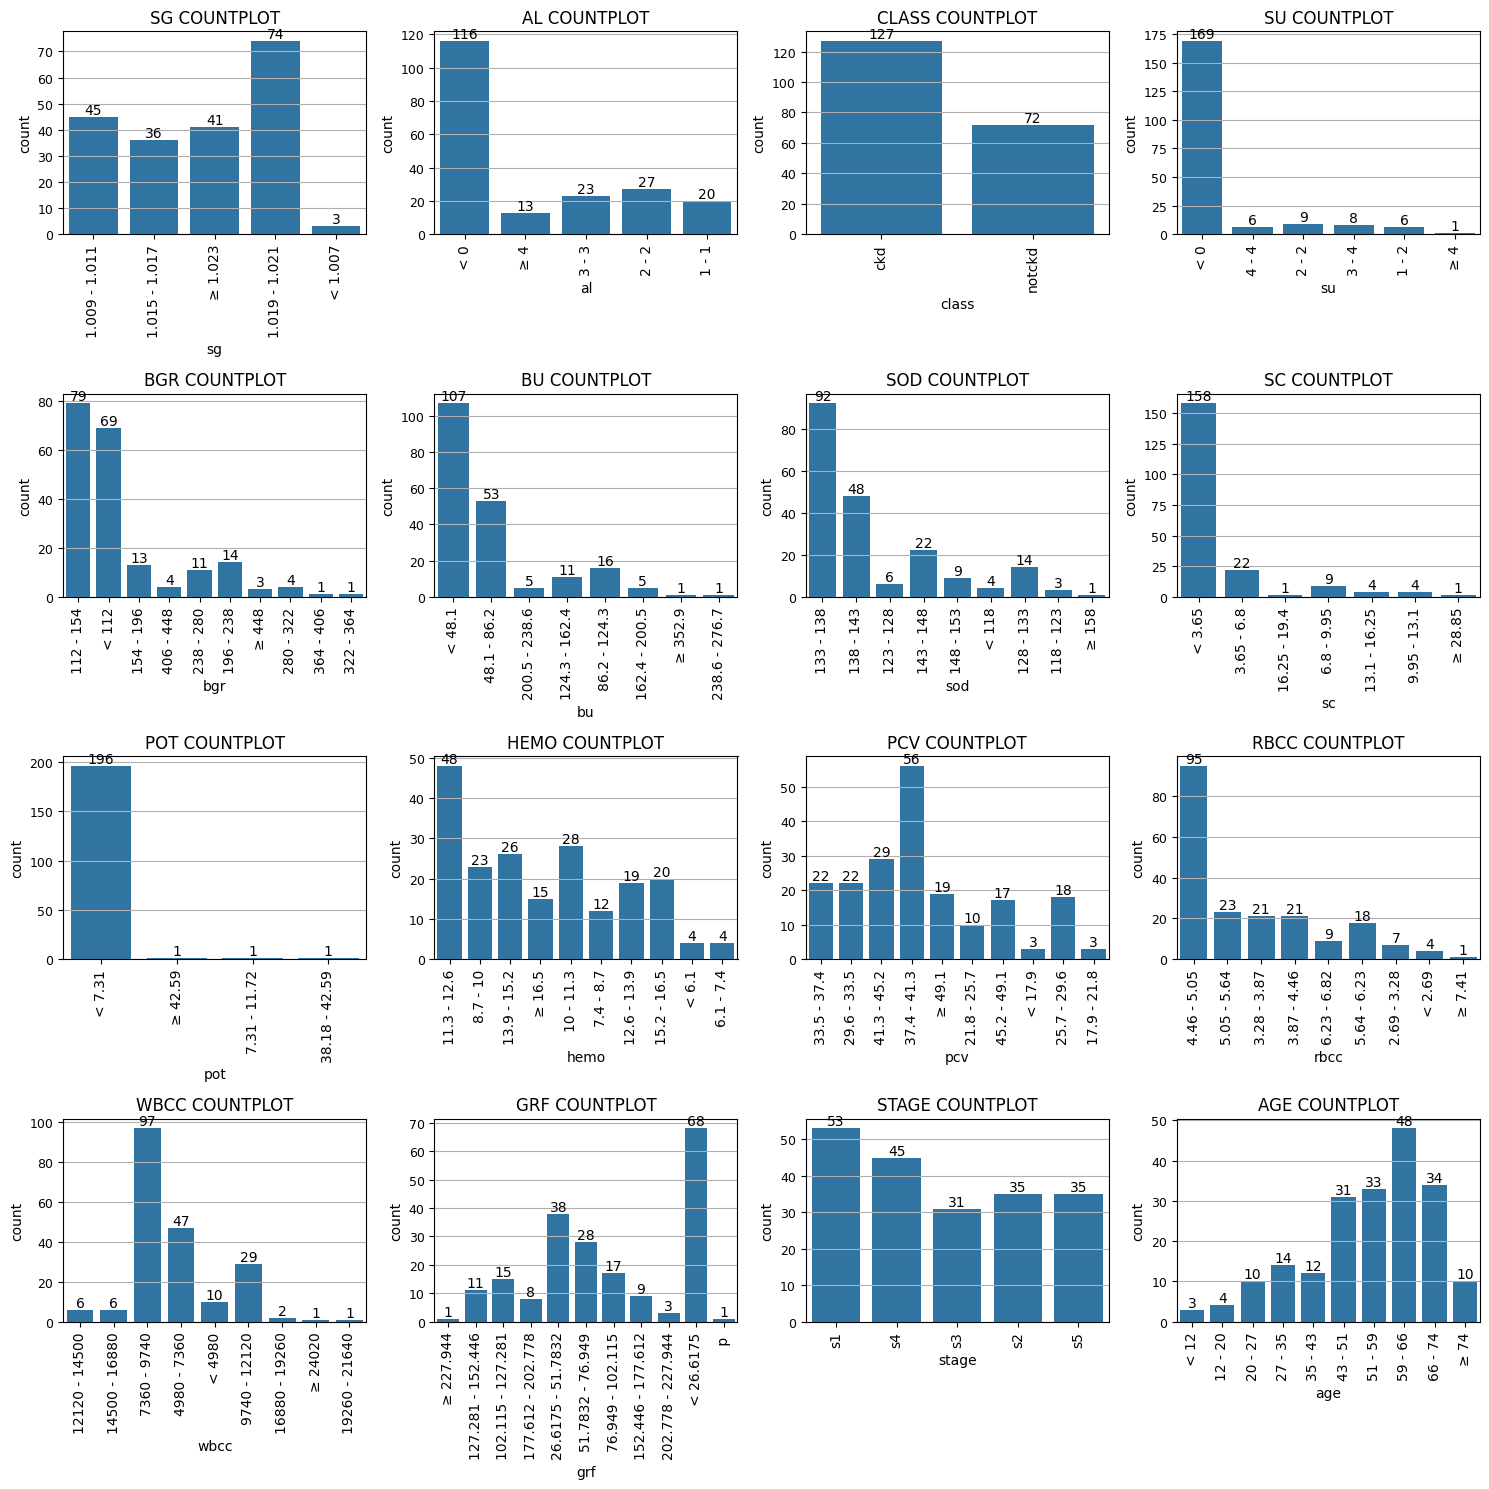

In [11]:
ig, axes = plt.subplots(4, 4, figsize=(15,15)) # Creates subplots to show all the columns in a 4x4 matrix
axes = axes.ravel()

for column, ax in zip(categorical_data_df.columns, axes):
    ax.set(title=f'{column.upper()} COUNTPLOT', xlabel=None)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', rotation=90)
    plot = sns.countplot(x=categorical_data_df[column], ax=ax)
    ax.bar_label(ax.containers[0], fontsize=10)

    ax.yaxis.grid(True) # Hide the horizontal gridlines
    ax.xaxis.grid(False) # Show the vertical gridlines

for i,ax in enumerate(axes): # Removes empty plot in subplots
    if(not ax.get_title()):
     ax.remove()


plt.tight_layout()
plt.show()

#### Numerical data

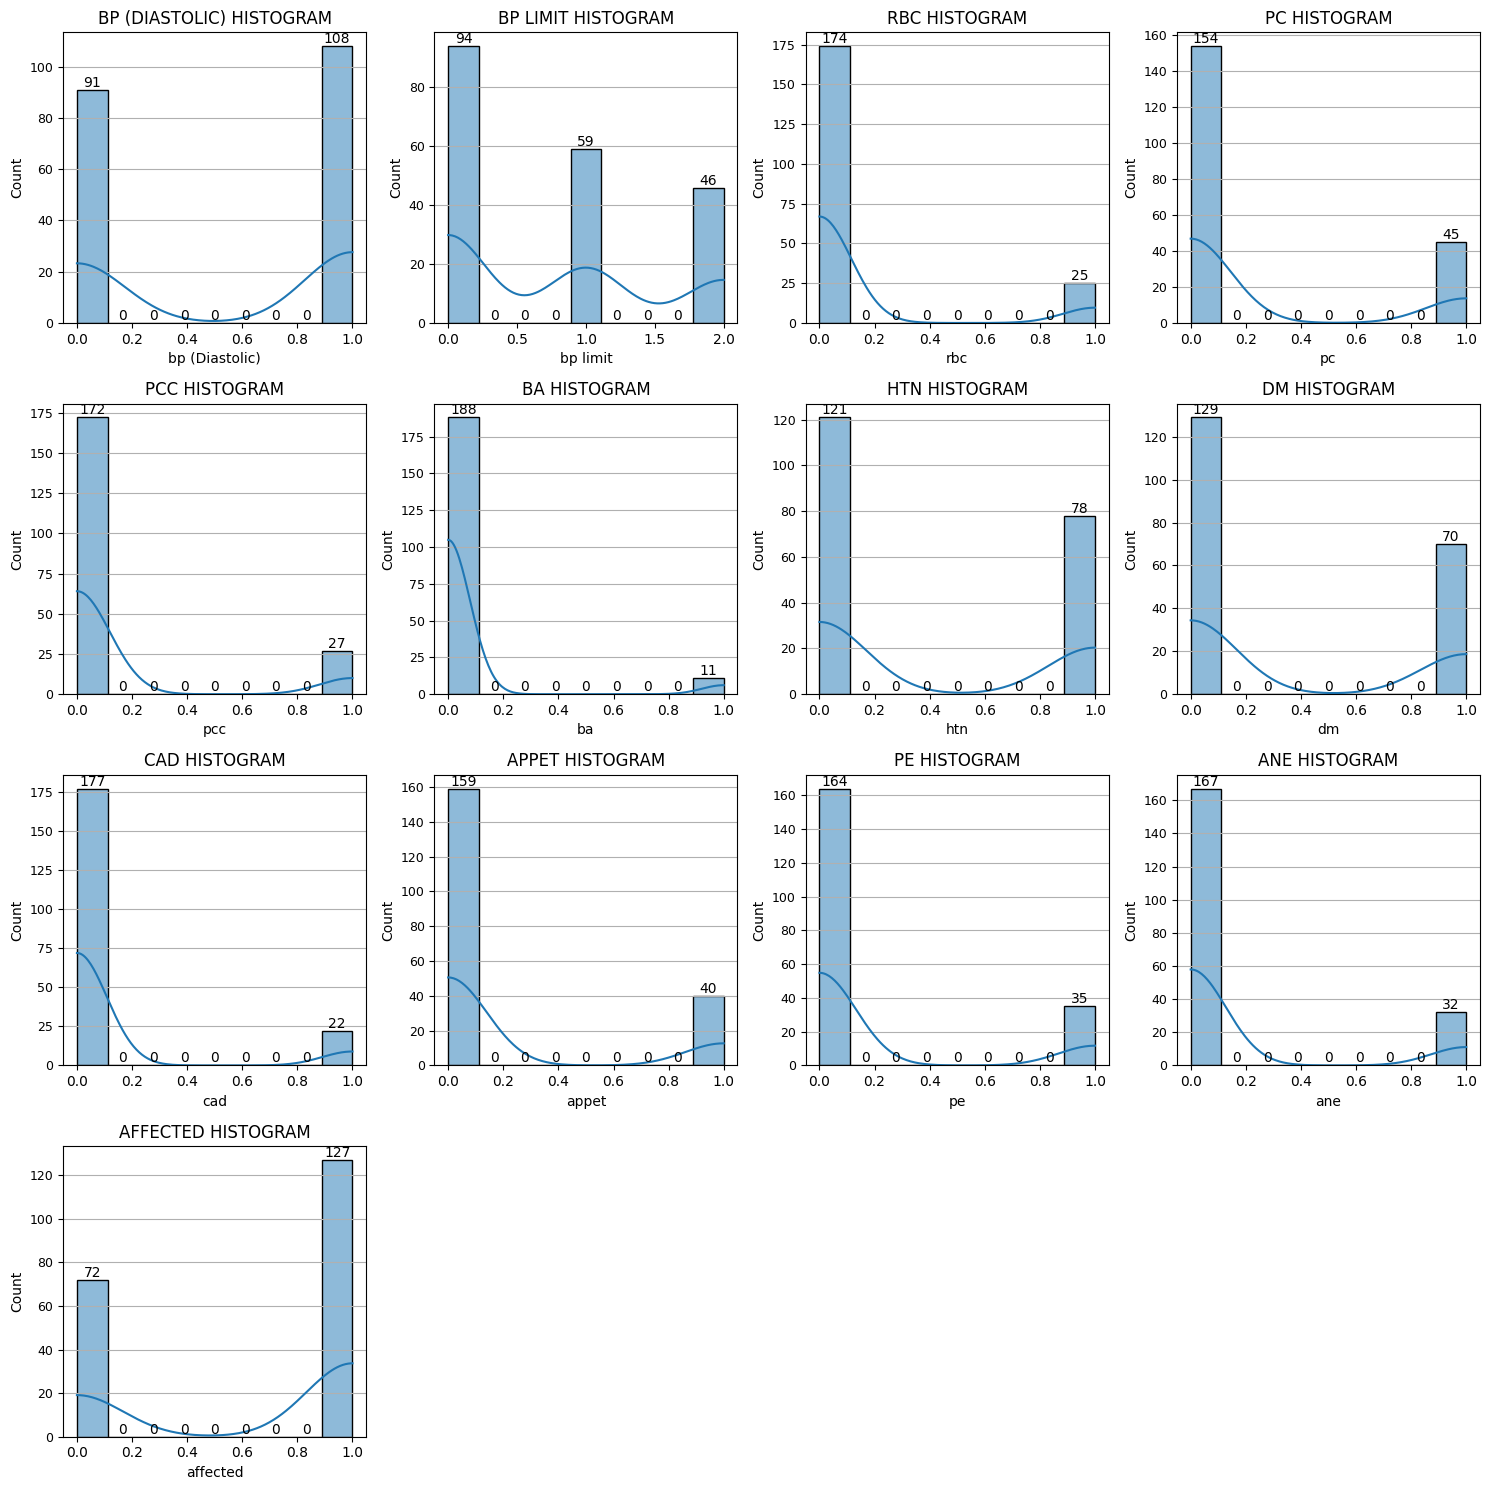

In [12]:
ig, axes = plt.subplots(4, 4, figsize=(15,15)) # Creates subplots to show all the columns in a 4x4 matrix
axes = axes.ravel()

for column, ax in zip(quantitative_data_df.columns, axes):
    ax.set(title=f'{column.upper()} HISTOGRAM', xlabel=None)
    ax.tick_params(axis='y', labelsize=9)
    plot = sns.histplot(x=quantitative_data_df[column], ax=ax, kde=True)
    ax.bar_label(ax.containers[0], fontsize=10)

    ax.yaxis.grid(True) # Hide the horizontal gridlines
    ax.xaxis.grid(False) # Show the vertical gridlines

for i,ax in enumerate(axes): # Removes empty plot in subplots
    if(not ax.get_title()):
     ax.remove()
plt.tight_layout()
plt.show()

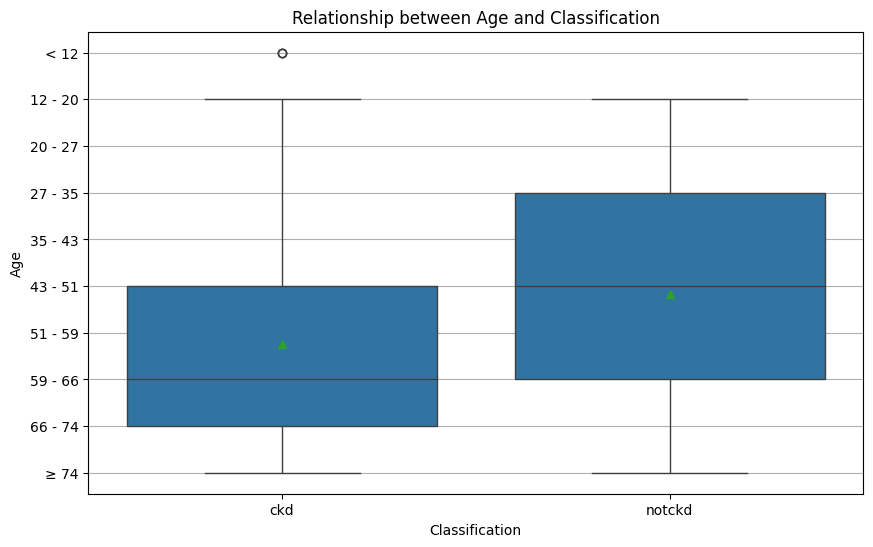

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='age', data=risk_factor_prediction_of_chronic_kidney_disease_df, showmeans=True)
plt.title('Relationship between Age and Classification')
plt.xlabel('Classification')
plt.ylabel('Age')
plt.grid(visible=True, axis='y', which='both')
plt.show()

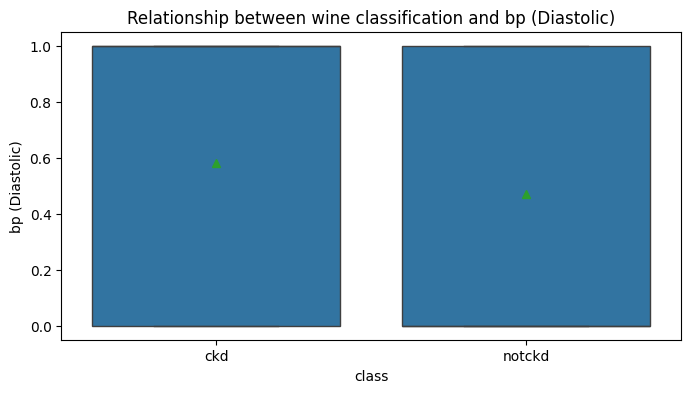

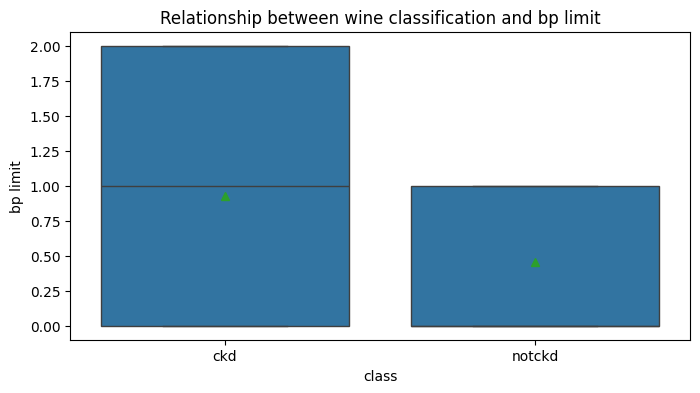

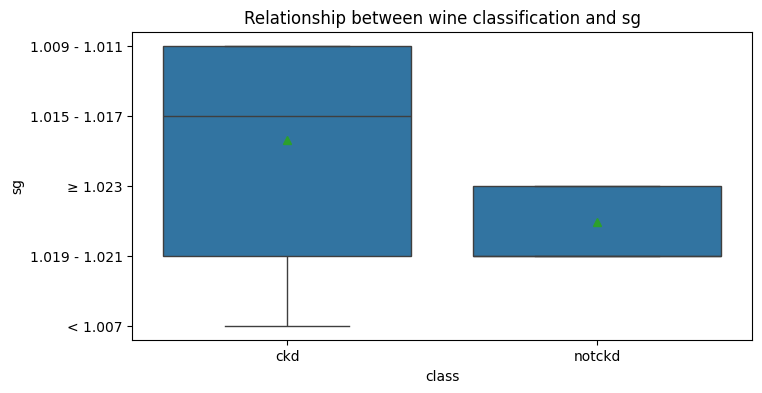

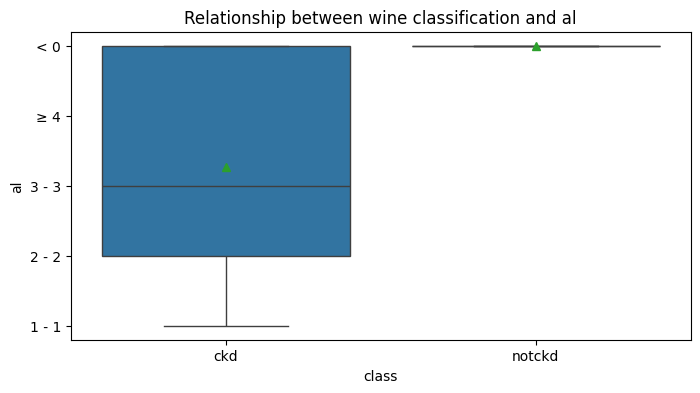

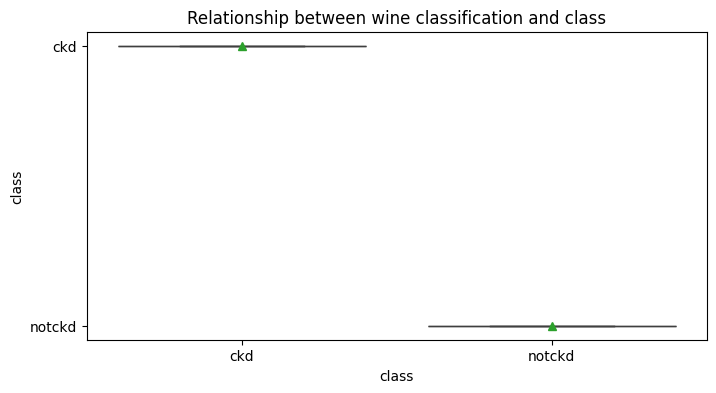

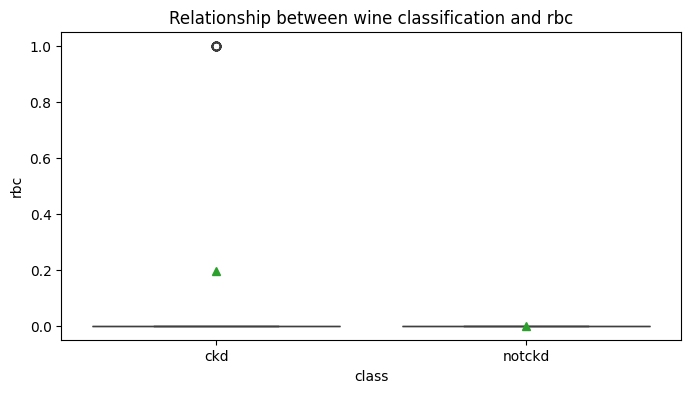

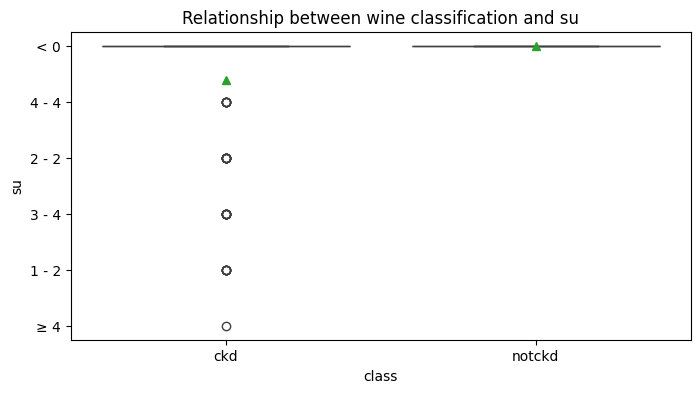

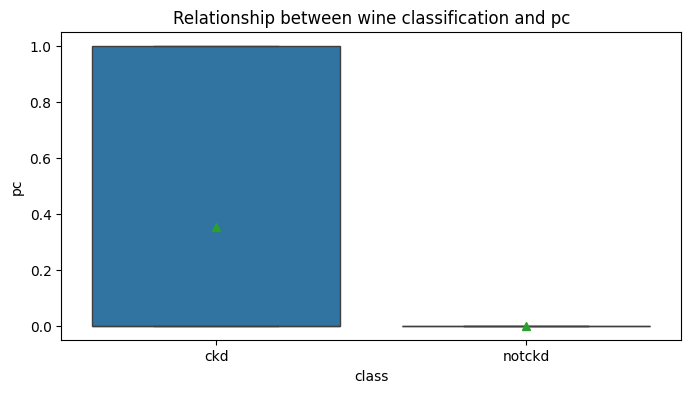

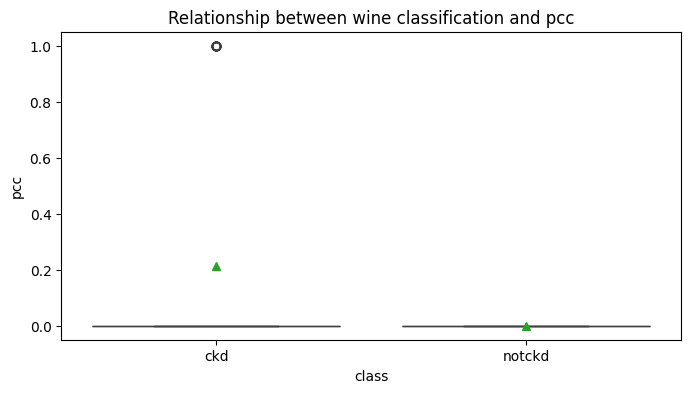

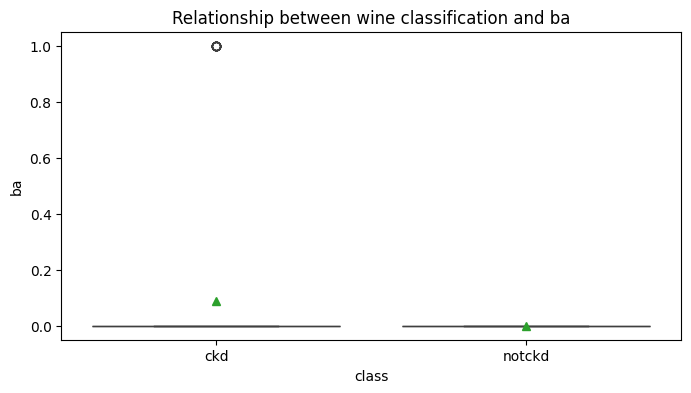

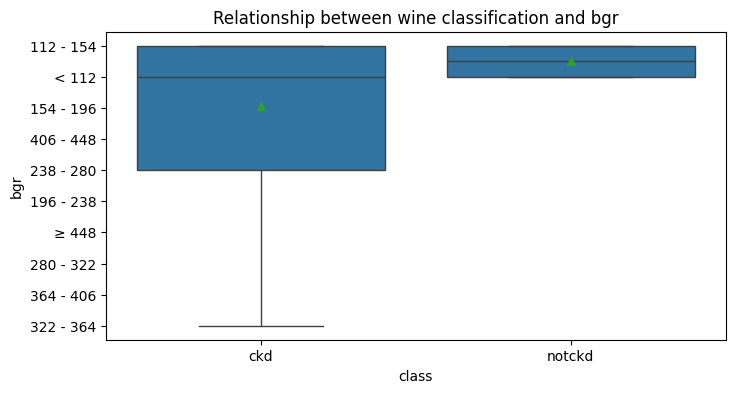

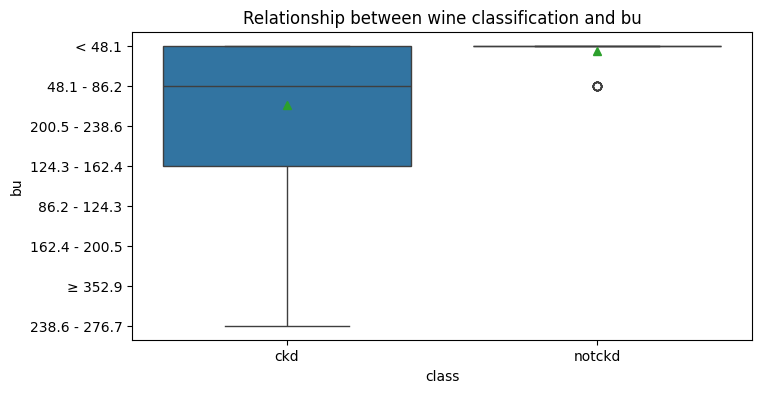

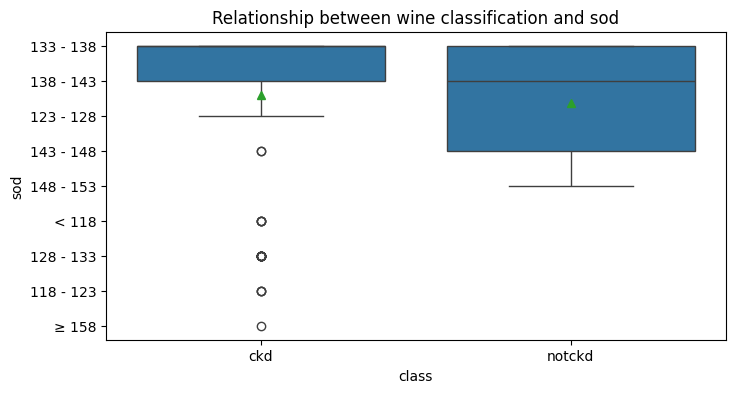

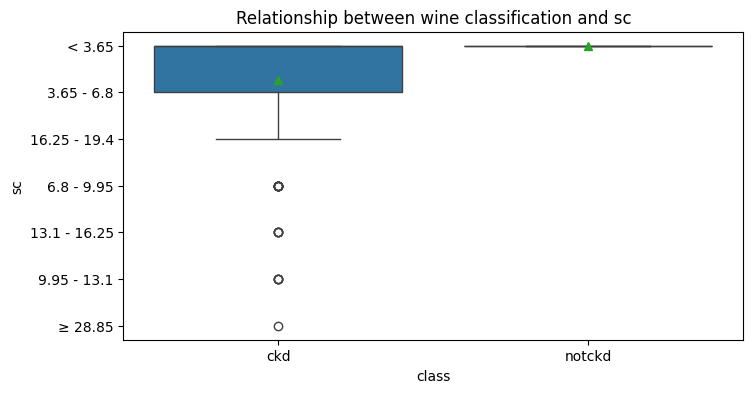

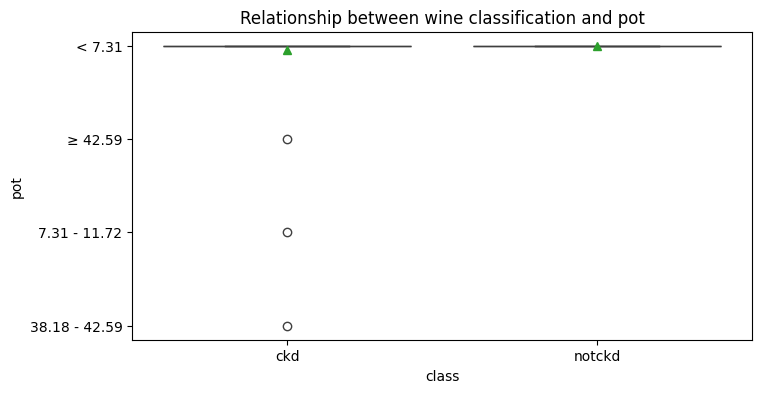

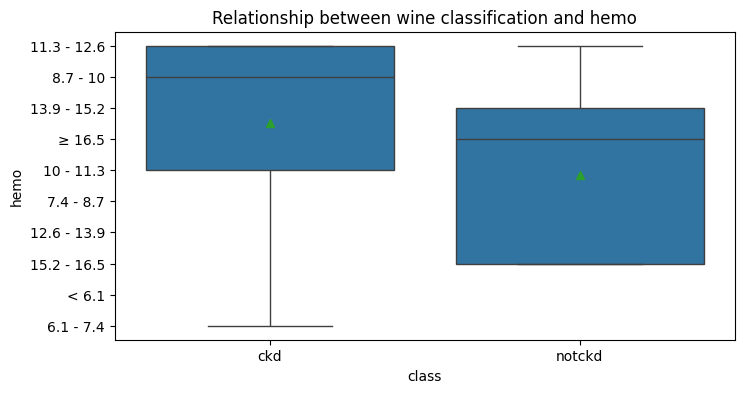

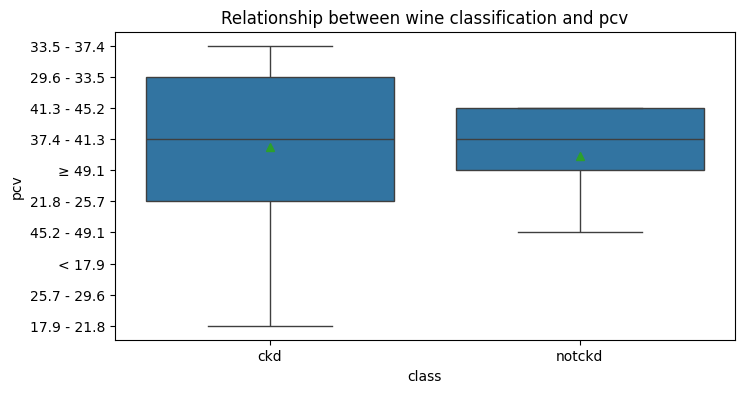

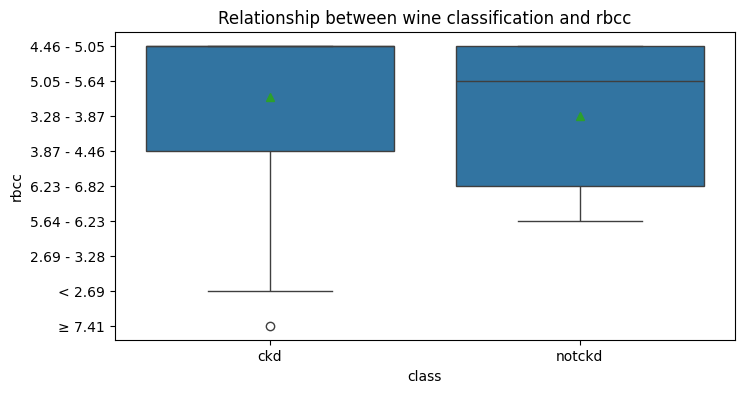

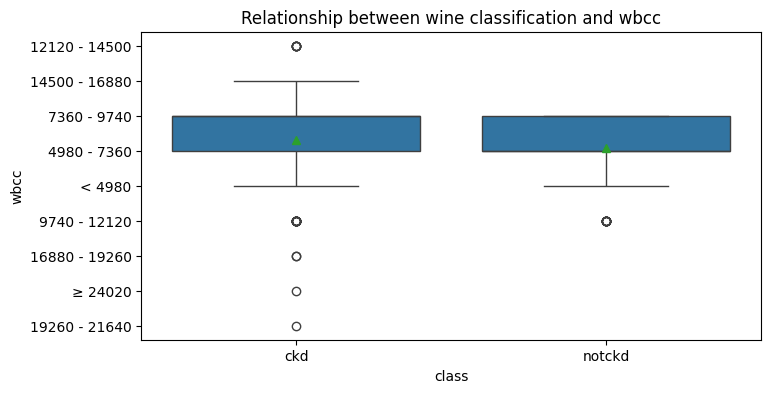

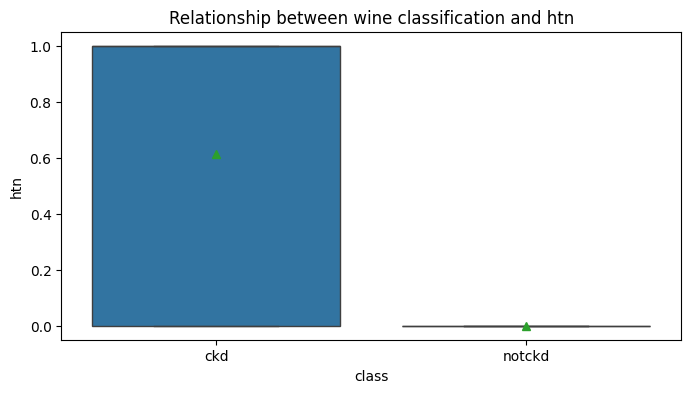

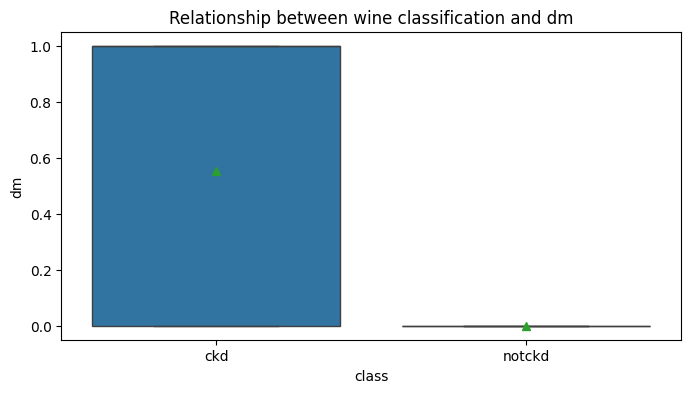

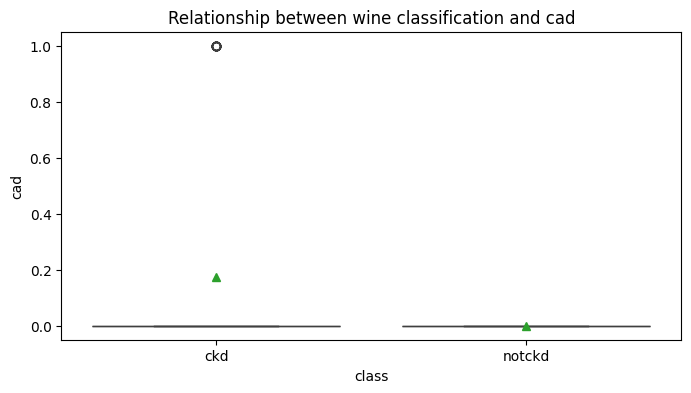

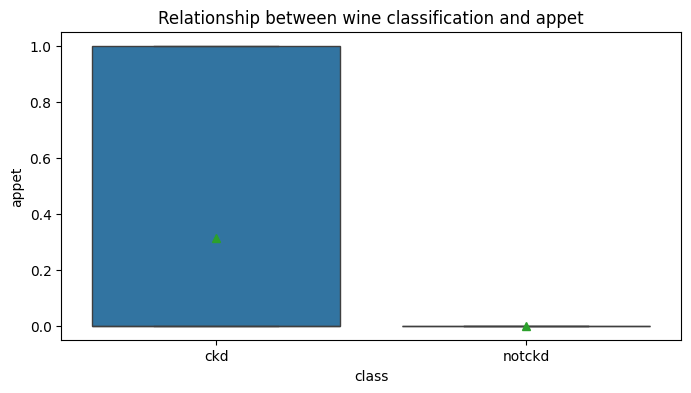

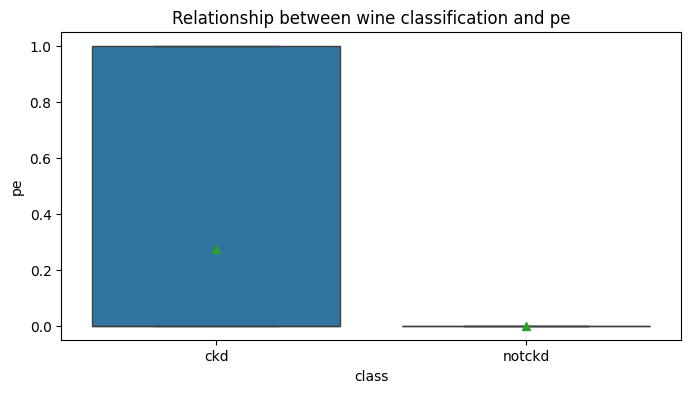

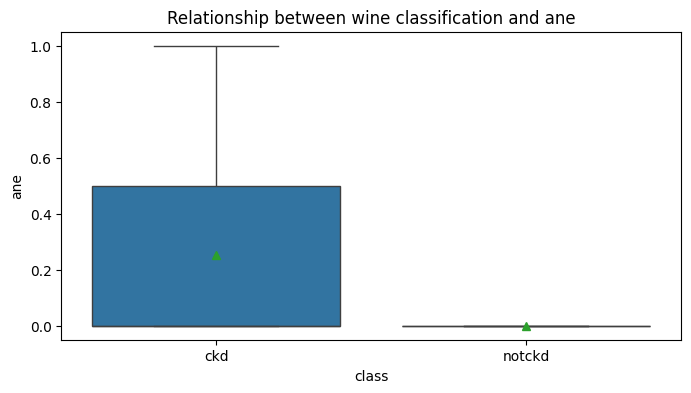

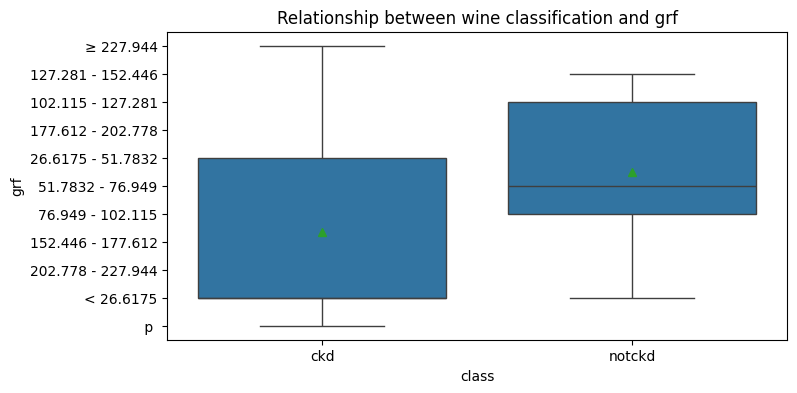

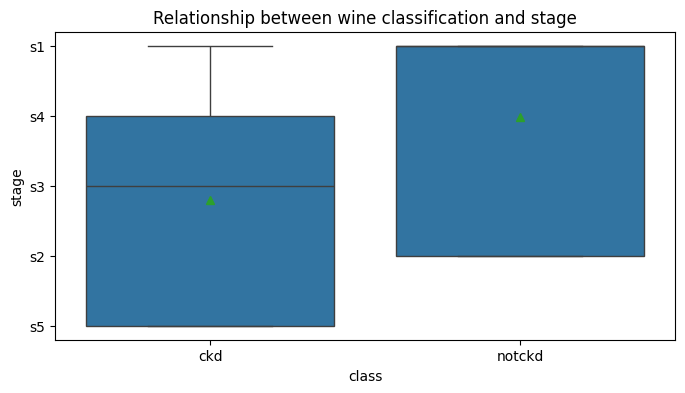

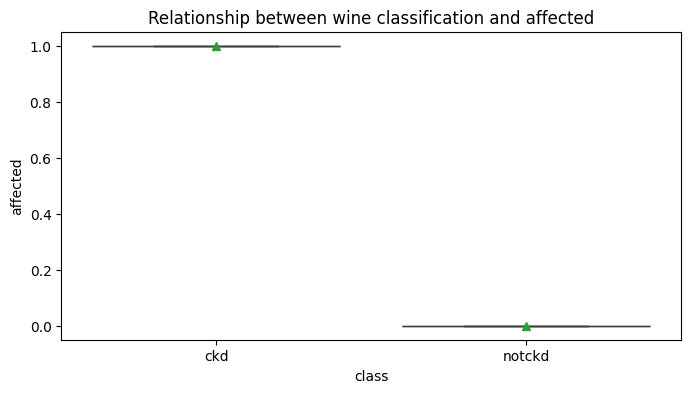

In [14]:
# Loking at the relationship between the features and the wine quality
for column in risk_factor_prediction_of_chronic_kidney_disease_df.columns[:-1]:  # Excluye la columna 'quality'
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='class', y=column, data=risk_factor_prediction_of_chronic_kidney_disease_df, showmeans=True)
    plt.title(f'Relationship between wine classification and {column}')
    plt.show()

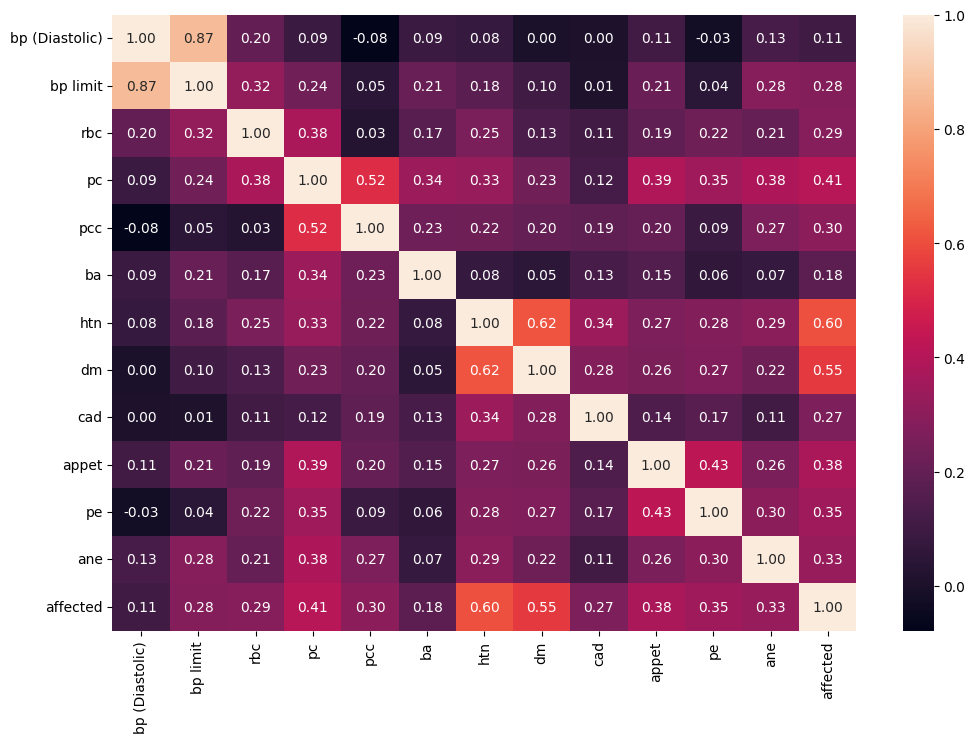

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(quantitative_data_df.corr(), annot=True, fmt='.2f')
plt.show()

## Feature Engineering

### Preprocess categorical data

As the categorical columns show values that are sorted in some order, we will use `LabelEncoder` from `scikit-learn`

In [16]:
risk_factor_prediction_of_chronic_kidney_disease_df['class'] = risk_factor_prediction_of_chronic_kidney_disease_df['class'].replace({'ckd':1, 'notckd':0})

/tmp/ipykernel_18563/2925178633.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  risk_factor_prediction_of_chronic_kidney_disease_df['class'] = risk_factor_prediction_of_chronic_kidney_disease_df['class'].replace({'ckd':1, 'notckd':0})


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in categorical_data_df.columns:
    risk_factor_prediction_of_chronic_kidney_disease_df[column] = le.fit_transform(risk_factor_prediction_of_chronic_kidney_disease_df[column])

risk_factor_prediction_of_chronic_kidney_disease_df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,0,3,1,0,4,0,0,0,...,0,0,0,0,0,0,10,0,1,8
1,0,0,0,4,1,1,4,1,0,1,...,0,0,0,1,0,0,2,0,1,8
2,1,1,0,2,1,0,4,0,0,0,...,0,0,0,0,0,0,2,0,1,8
3,0,0,1,3,1,0,4,0,0,0,...,0,1,0,1,1,0,2,0,1,0
4,1,1,4,3,0,0,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
risk_factor_prediction_of_chronic_kidney_disease_df['class'].value_counts()

class
1    127
0     72
Name: count, dtype: int64

In [19]:
risk_factor_prediction_of_chronic_kidney_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   bp (Diastolic)  199 non-null    int64
 1   bp limit        199 non-null    int64
 2   sg              199 non-null    int64
 3   al              199 non-null    int64
 4   class           199 non-null    int64
 5   rbc             199 non-null    int64
 6   su              199 non-null    int64
 7   pc              199 non-null    int64
 8   pcc             199 non-null    int64
 9   ba              199 non-null    int64
 10  bgr             199 non-null    int64
 11  bu              199 non-null    int64
 12  sod             199 non-null    int64
 13  sc              199 non-null    int64
 14  pot             199 non-null    int64
 15  hemo            199 non-null    int64
 16  pcv             199 non-null    int64
 17  rbcc            199 non-null    int64
 18  wbcc            199 non-null  

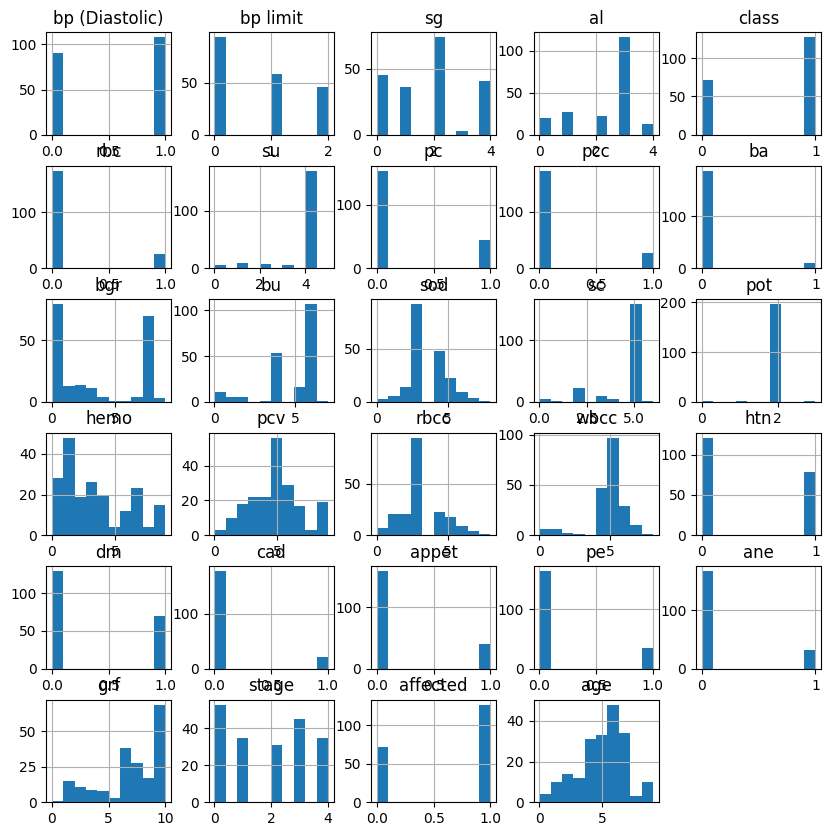

In [20]:
risk_factor_prediction_of_chronic_kidney_disease_df.hist(bins=10, figsize=(10,10))
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(risk_factor_prediction_of_chronic_kidney_disease_df.drop(columns=['class'], axis=1))

risk_factor_prediction_of_chronic_kidney_disease_df_scaled = pd.DataFrame(features_scaled, columns=risk_factor_prediction_of_chronic_kidney_disease_df.columns[:-1])
risk_factor_prediction_of_chronic_kidney_disease_df_scaled['class'] = risk_factor_prediction_of_chronic_kidney_disease_df['class']

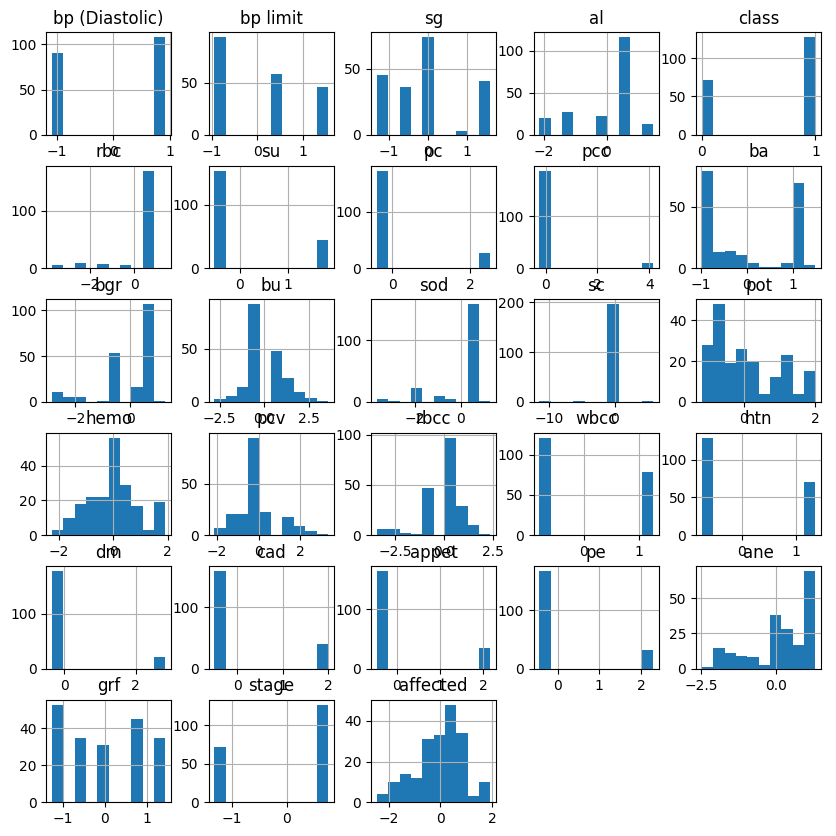

In [22]:
risk_factor_prediction_of_chronic_kidney_disease_df_scaled.hist(bins=10, figsize=(10,10))
plt.show()

## Split dataset

In [23]:
# Inputs
X = risk_factor_prediction_of_chronic_kidney_disease_df.drop(columns=['class'])

# Labels
y = risk_factor_prediction_of_chronic_kidney_disease_df['class']

X train: (160, 28)	y train: (160,)
X test: (39, 28)	y test: (39,)


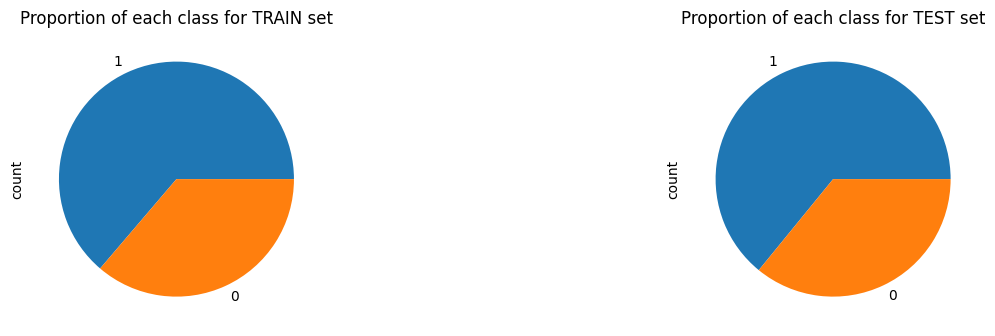

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=160, random_state=42, stratify=y)

print(f'X train: {X_train.shape}\ty train: {y_train.shape}\nX test: {X_test.shape}\ty test: {y_test.shape}')

plt.subplot(1,3,1)
y_train.value_counts().plot.pie(y='class', title='Proportion of each class for TRAIN set', figsize=(10,6))

plt.subplot(1,3,3)
y_test.value_counts().plot.pie(y='class', title='Proportion of each class for TEST set', figsize=(10,6))

plt.tight_layout()
plt.show()

In [32]:
y_train.value_counts()

class
1    102
0     58
Name: count, dtype: int64

In [33]:
y_test.value_counts()

class
1    25
0    14
Name: count, dtype: int64

### First Model

/home/chrisorduna/Repositories/MNA/.venv/mlops_venv3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


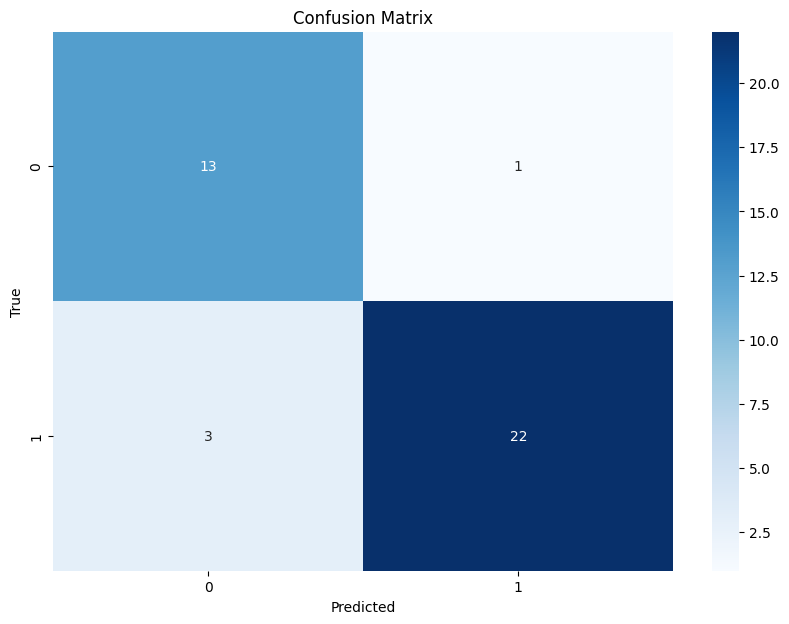

,precision,recall,f1-score,support
0,0.812500,0.928571,0.866667,14.000000
1,0.956522,0.880000,0.916667,25.000000
accuracy,0.897436,0.897436,0.897436,0.897436
macro avg,0.884511,0.904286,0.891667,39.000000
weighted avg,0.904822,0.897436,0.898718,39.000000


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

log_regression_model = LogisticRegression(max_iter=3, class_weight='balanced')
log_regression_model.fit(X_train, y_train)

y_hat = log_regression_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_hat, output_dict=True)
class_report_df = pd.DataFrame(class_report).T
class_report_df

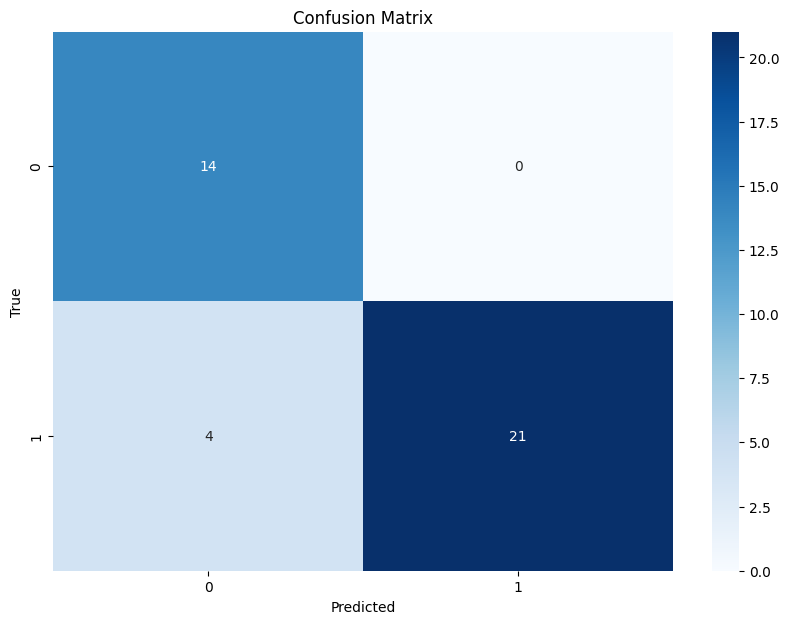

,precision,recall,f1-score,support
0,0.777778,1.000000,0.875000,14.000000
1,1.000000,0.840000,0.913043,25.000000
accuracy,0.897436,0.897436,0.897436,0.897436
macro avg,0.888889,0.920000,0.894022,39.000000
weighted avg,0.920228,0.897436,0.899387,39.000000


In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=2, random_state=21)
rf_model.fit(X_train, y_train)

y_hat_rf = rf_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_hat_rf)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

rf_class_report = classification_report(y_test, y_hat_rf, output_dict=True)
rf_class_report_df = pd.DataFrame(rf_class_report).T

rf_class_report_df

### PCA

In [54]:
from sklearn.decomposition import PCA

pca = PCA()
X_projected = pca.fit_transform(X_train)
X_projected = pd.DataFrame(X_projected)
X_projected

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.657626,-4.302241,-0.126917,-3.516333,-0.393790,0.906979,0.524635,0.351232,1.166145,-0.529171,...,0.133257,-0.204333,-0.176725,0.050460,-0.090342,-0.021284,0.043895,-0.004094,0.063915,-0.015995
1,-5.348863,3.255779,-2.068654,0.382457,-0.314772,-3.879242,-0.366054,-0.628145,1.280536,0.854636,...,0.786993,0.503758,-0.087533,0.438713,0.224299,0.247376,0.404426,0.049652,-0.236639,-0.034695
2,-3.448606,-1.622800,3.885973,-0.892913,1.011203,0.536250,0.095262,-0.018168,-0.632818,-1.698253,...,0.012578,0.039465,-0.318728,-0.054400,-0.304873,0.143677,0.032706,0.268399,-0.020333,0.022883
3,2.200689,4.028565,5.084865,-2.963973,1.119899,-0.803283,-2.552314,0.032105,-3.354785,0.544967,...,-0.256707,-0.703684,0.233206,0.108020,0.423238,0.048213,-0.271130,0.082584,0.018302,-0.108109
4,7.504265,-0.285961,-1.063142,-0.589811,-2.146309,-0.533972,1.388349,0.110179,0.853428,0.793736,...,0.102166,-0.088057,0.091141,0.103959,-0.029874,-0.051456,0.065938,0.007524,0.054370,0.111975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-7.619533,1.323891,-2.507226,2.129829,1.137509,-2.422272,0.329322,-0.659121,-1.142168,0.823326,...,0.523752,-0.243054,-0.728067,0.212458,-0.008514,-0.136886,-0.082827,0.041130,-0.134317,-0.077465
156,4.313784,-7.379758,5.056017,0.504028,0.124828,-0.916888,-0.645181,-0.004732,-0.503906,-0.135330,...,0.178843,-0.088652,-0.069425,-0.032476,-0.079778,0.079304,-0.046536,0.102971,0.058328,-0.023591
157,-2.039646,-0.835137,-2.616195,-1.245571,0.584578,1.902995,-0.672666,-1.605482,-0.054125,-1.376805,...,-0.283261,0.279468,0.306532,0.566096,0.198905,-0.005708,-0.106752,0.160157,-0.078268,-0.094850
158,2.231379,-4.971206,-0.475445,-0.393111,-4.782947,0.758605,1.456940,0.225987,-1.106884,-1.525828,...,-0.392527,-0.184578,-0.088257,0.323516,0.106092,0.227539,-0.192409,0.175002,-0.020927,0.067665


In [30]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

variance_threshold = 0.9

for i, value in enumerate(cumulative_variance):
    if(value >= variance_threshold):
        pc_min = i + 1
        print(f'{pc_min} components are needed to get at least {variance_threshold * 100}% of the data.')
        break

10 components are needed to get at least 90.0% of the data.


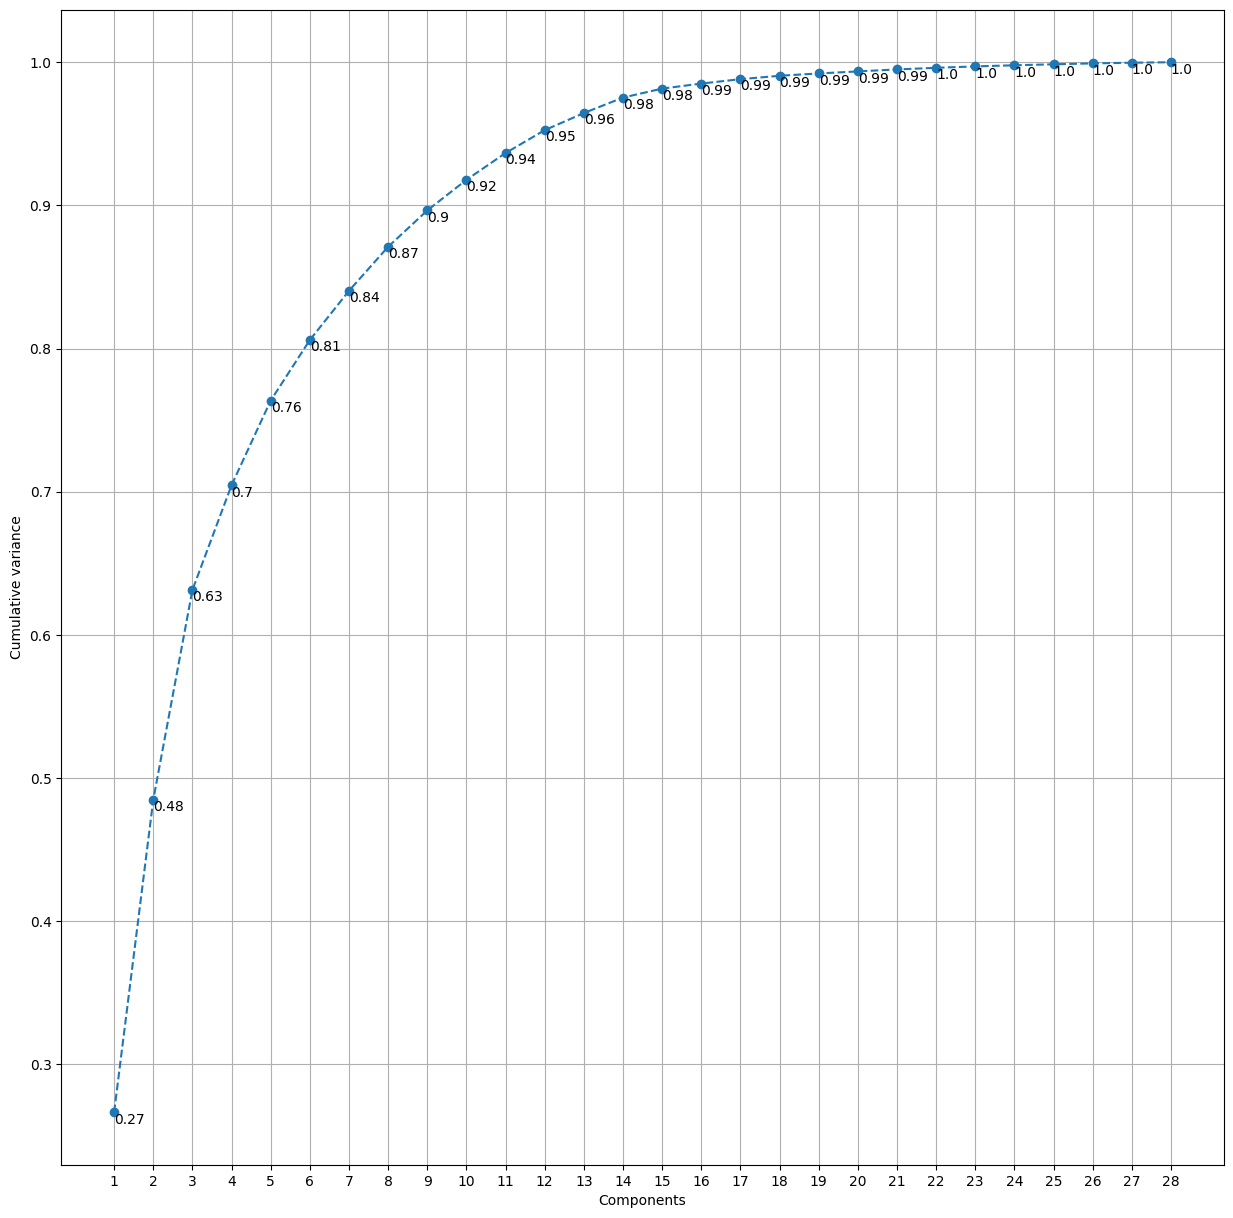

In [31]:
plt.figure(figsize=(15,15))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Components')
plt.ylabel('Cumulative variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)

for (xi, yi) in zip(range(1, len(cumulative_variance) + 1), cumulative_variance):
    plt.text(xi, yi, round(yi, 2), va='top', ha='left')

plt.show()

In [50]:
X_projected_min_df = X_projected.iloc[:,:pc_min]
X_projected_min_df.columns = [f'pc_{i}' for i in range(1, pc_min + 1)]
X_projected_min_df.head()

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10
18,1,1,2,3,0,4,0,0,0,0
183,1,1,2,1,1,4,1,0,0,3
94,1,1,0,3,0,4,0,0,0,0
72,1,2,2,3,0,4,0,0,0,8
20,1,1,4,3,0,4,0,0,0,8


/home/chrisorduna/Repositories/MNA/.venv/mlops_venv3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


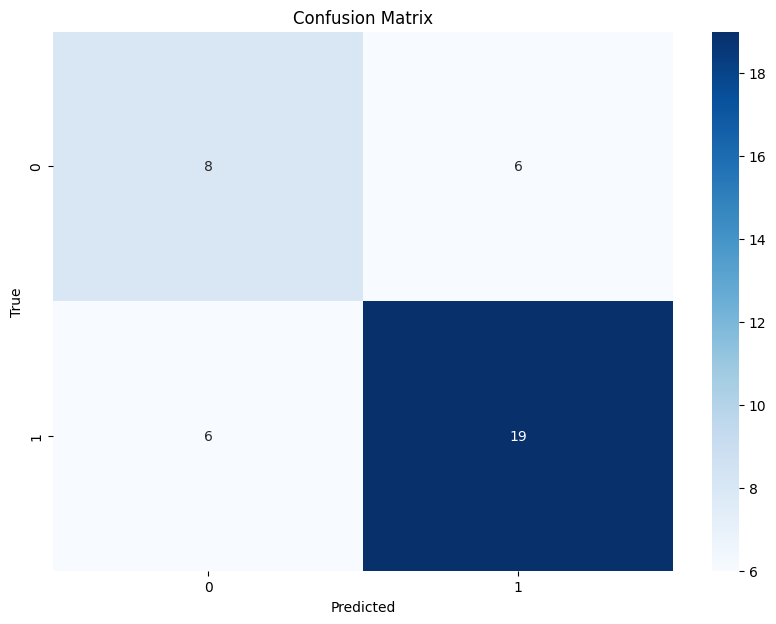

,precision,recall,f1-score,support
0,0.571429,0.571429,0.571429,14.000000
1,0.760000,0.760000,0.760000,25.000000
accuracy,0.692308,0.692308,0.692308,0.692308
macro avg,0.665714,0.665714,0.665714,39.000000
weighted avg,0.692308,0.692308,0.692308,39.000000


In [64]:
log_regression_model.fit(X_projected_min_df, y_train)

X_test_projected = pca.transform(X_test)
X_test_pca_df = pd.DataFrame(X_test_projected)
X_test_pca_df_min = X_test_pca_df.iloc[:,:pc_min]
X_test_pca_df_min.columns = [f'pc_{i}' for i in range(1, pc_min + 1)]

y_hat = log_regression_model.predict(X_test_pca_df_min)

# Confusion Matrix
cm = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_hat, output_dict=True)
class_report_df = pd.DataFrame(class_report).T
class_report_df